# Q-14 WAP to perform feature selection using filter and wrapper method.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

In [2]:
x=datasets.load_iris()

In [3]:
data=pd.DataFrame(x.data,columns=x.feature_names)

In [4]:
data["target"]=x.target

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
df=data
df1=df.drop(['target'],axis=1)

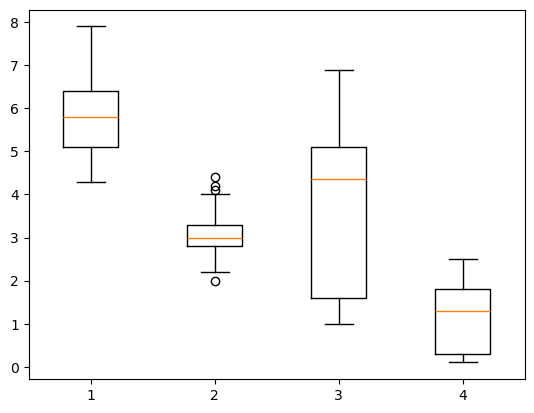

In [7]:
plt.boxplot(df1)
plt.show()

In [8]:
df1.clip(df1.quantile(0.1),df1.quantile(0.9),axis=1,inplace=True)

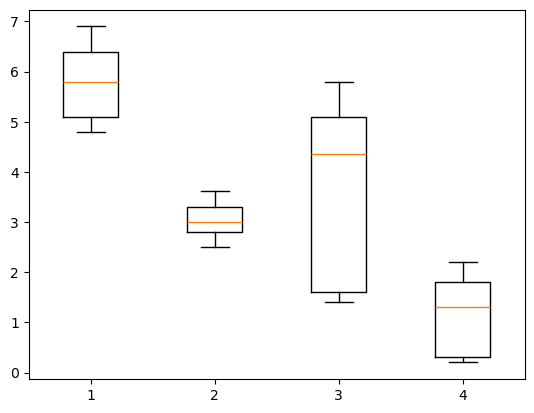

In [9]:
plt.boxplot(df1)
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler_rob=MinMaxScaler()

scaled_data=scaler_rob.fit_transform(df1)

scaled_df=pd.DataFrame(scaled_data,columns=df1.columns)
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.142857,0.900901,0.000000,0.00
1,0.047619,0.450450,0.000000,0.00
2,0.000000,0.630631,0.000000,0.00
3,0.000000,0.540541,0.022727,0.00
4,0.095238,0.990991,0.000000,0.00
...,...,...,...,...
145,0.904762,0.450450,0.863636,1.00
146,0.714286,0.000000,0.818182,0.85
147,0.809524,0.450450,0.863636,0.90
148,0.666667,0.810811,0.909091,1.00


In [12]:
from sklearn.feature_selection import chi2,mutual_info_classif,SelectKBest,mutual_info_regression
from skfeature.function.similarity_based import fisher_score

ModuleNotFoundError: No module named 'skfeature'

In [ ]:
#information gain
x=df1
y=df["target"]

importance=mutual_info_classif(x,y)
f_importance=pd.Series(importance, df.columns[0:len(df.columns)-1])
f_importance.plot(kind='barh',color='teal')
plt.show()

In [ ]:
chi2_features = SelectKBest(chi2,k=2)
x_kbest_features=chi2_features.fit_transform(x,y)

print("Original : ",x.shape[1])
print("Reduced : ",x_kbest_features.shape[1])
selected_features = df.columns[:-1][chi2_features.get_support()] 
print(selected_features)

In [ ]:
x=np.array(x)
y=np.array(y)
ranks=fisher_score.fisher_score(x,y)

feat_importances=pd.Series(ranks,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh',color="teal")
plt.show()